# Interpolacja trygonometryczna

In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt

### Określenie węzłów interpolacji (xi,yi)

In [4]:
x=np.arange(0,20)
print("x=",x)

x= [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


$$x_{k}=k\cdot \frac{2\pi}{n} \ \ \ \ \ k=0,1,...,(n-1)$$

In [5]:
xk=(x*2*math.pi)/(len(x))
print("xk=",xk)

xk= [0.         0.31415927 0.62831853 0.9424778  1.25663706 1.57079633
 1.88495559 2.19911486 2.51327412 2.82743339 3.14159265 3.45575192
 3.76991118 4.08407045 4.39822972 4.71238898 5.02654825 5.34070751
 5.65486678 5.96902604]


In [6]:
#yk=np.array([1,1,1,1,1,1,1,2,2,2,2,2,1,1,1,1,1,1,1,1])
#yk=np.array([0,1,2,3,4,5,6,7,8,9])
#yk=np.array([1,1,1,1,1,1,1,1,1,1])
#yk=np.sin(xk)+0.4*np.sin(2*xk)
yk=np.sin(xk)+0.4*np.sin(2*xk)
print("yk=",yk)
n=len(xk)
m=int(n/2)

yk= [ 0.00000000e+00  5.44131095e-01  9.68207859e-01  1.18943960e+00
  1.18617062e+00  1.00000000e+00  7.15942415e-01  4.28594388e-01
  2.07362646e-01  7.39028935e-02  2.44929360e-17 -7.39028935e-02
 -2.07362646e-01 -4.28594388e-01 -7.15942415e-01 -1.00000000e+00
 -1.18617062e+00 -1.18943960e+00 -9.68207859e-01 -5.44131095e-01]


### Prezentacja graficzna węzłów interpolacji

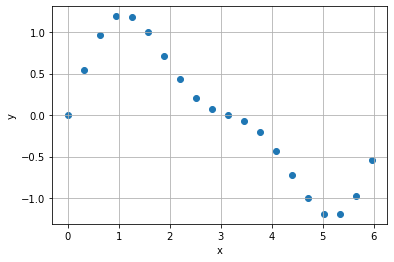

In [7]:
plt.figure()
plt.grid()
plt.xlabel("x")
plt.ylabel("y")
plt.scatter(xk,yk)

### W przypadku parzystej liczby węzłów interpolacji:

$$m=\frac{n}{2} $$

$$F(x)=\frac{A_{0}}{2} +\sum^{m-1}_{k=1} [A_{k}\cdot cos(k\cdot x)+B_{k}\cdot sin(k\cdot x)]+\frac{A_{m}}{2} \cdot cos(m\cdot x)$$

### W przypadku nieparzystej liczby węzłów interpolacji:

$$m=\frac{n-1}{2} $$

$$F(x)=\frac{A_{0}}{2} +\sum^{m}_{k=1} [A_{k}\cdot cos(k\cdot x)+B_{k}\cdot sin(k\cdot x)]$$

### Dla obu przypadków:

$$A_{j}=\frac{2}{n} \sum^{n-1}_{k=0} [f(x_{k})\cdot cos(j\cdot x_{k})]$$

$$B_{j}=\frac{2}{n} \sum^{n-1}_{k=0} [f(x_{k})\cdot sin(j\cdot x_{k})]$$

### Funkcja wyznaczająca współczynniki Aj, Bj:

In [8]:
def f_wsp(xk,yk):
    n=len(xk)
    m=int(n/2)
    A=np.zeros(m+1)
    B=np.zeros(m+1)
    for i in range(0,m+1):
        A[i]=0
        B[i]=0
        for j in range(0,n):
                A[i]+=yk[j]*math.cos(i*xk[j])
                B[i]+=yk[j]*math.sin(i*xk[j])
        A[i]*=(2/n)
        B[i]*=(2/n)
    return A,B

In [11]:
A,B=f_wsp(xk,yk)
print("A=\n",A)
print("B=\n",B)

A=
 [-3.33066907e-17  2.22044605e-17  4.99600361e-17  2.77555756e-17
  1.11022302e-17  5.92949077e-16 -3.96904731e-16 -7.77156117e-17
  5.55111512e-18  4.44089210e-17  0.00000000e+00]
B=
 [ 0.00000000e+00  1.00000000e+00  4.00000000e-01 -3.44169138e-16
 -3.33066907e-17 -2.22044605e-17  4.77395901e-16  2.77555756e-17
 -1.11022302e-17 -3.96904731e-16 -3.53129744e-17]


### Wyznaczenie wartości trygonometrycznego wielomianu interpolacyjnego:

In [12]:
x=np.linspace(0,4*math.pi,num=100)
w=np.zeros(len(x))

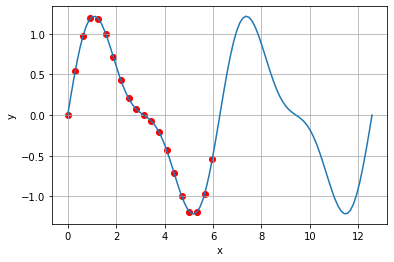

In [13]:
w=np.zeros(len(x))
m=int(len(xk)/2)

if n%2==0:
    for k in range(0,len(x)):   
        for i in range(1,m):
            w[k]=w[k]+A[i]*math.cos(i*x[k])+B[i]*math.sin(i*x[k])
        w[k]=w[k]+(A[m]/2)*math.cos(m*x[k])+A[0]/2
if n%2==1:
    for k in range(0,len(x)):   
        for i in range(1,m+1):
            w[k]=w[k]+A[i]*math.cos(i*x[k])+B[i]*math.sin(i*x[k])
        w[k]=w[k]+A[0]/2
        
plt.figure()
plt.plot(x,w)
plt.scatter(xk,yk,color="r")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()